<a href="https://colab.research.google.com/github/JM3309/Projects/blob/master/credit_risk_model_PDmodel_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install boto3

     |████████████████████████████████| 133kB 5.6MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 6.9MB 25.1MB/s 
     |████████████████████████████████| 143kB 45.7MB/s 
ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [2]:
import numpy as np
import pandas as pd
import boto3
import botocore
import csv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Read data from s3 bucket

In [3]:

session = boto3.session.Session(region_name='us-east-1')
s3 = boto3.resource('s3', aws_access_key_id='xxxxxxxxxxxx',    #put your own aws access key id
         aws_secret_access_key= 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')  #your own aws secret access key


In [4]:
bucket = s3.Bucket('ml-project-jm3309')

loan_data_inputs_train1 = bucket.Object(key='credit-risk-model/loan_data_inputs_train.csv')
loan_data_targets_train1 = bucket.Object(key='credit-risk-model/loan_data_targets_train.csv')
loan_data_inputs_test1 = bucket.Object(key='credit-risk-model/loan_data_inputs_test.csv')
loan_data_targets_test1 = bucket.Object(key='credit-risk-model/loan_data_targets_test.csv')

loan_data_inputs_train = loan_data_inputs_train1.get()['Body']
loan_data_targets_train = loan_data_targets_train1.get()['Body']
loan_data_inputs_test = loan_data_inputs_test1.get()['Body']
loan_data_targets_test = loan_data_targets_test1.get()['Body']


In [5]:
inputs_train = pd.read_csv(loan_data_inputs_train, index_col = 0)
targets_train = pd.read_csv(loan_data_targets_train, index_col = 0) #
inputs_test = pd.read_csv(loan_data_inputs_test, index_col = 0)
targets_test = pd.read_csv(loan_data_targets_test, index_col = 0)#, header = None

In [6]:
loan_data_inputs_train = inputs_train.copy()
loan_data_targets_train =targets_train.copy()
loan_data_inputs_test =inputs_test.copy()
loan_data_targets_test =targets_test.copy()

In [7]:
print(loan_data_inputs_train.shape,loan_data_targets_train.shape,loan_data_inputs_test.shape,loan_data_targets_test.shape)

(373028, 298) (373028, 1) (93257, 298) (93257, 1)


## Selecting the Features

In [8]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
#'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
#'mths_since_last_record:Missing',
#'mths_since_last_record:0-2',
##'mths_since_last_record:3-20',
#'mths_since_last_record:21-31',
#'mths_since_last_record:32-80',
##'mths_since_last_record:81-86',
#'mths_since_last_record:>=86',
]]

In [9]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
]

In [10]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_train.shape

(373028, 78)

In [11]:
inputs_train = inputs_train.fillna(lambda x: x.median())
loan_data_targets_train = loan_data_targets_train.fillna(lambda x: x.median())

In [12]:
inputs_train.shape

(373028, 78)

## PD model estimation


### logistic regression with P- value


In [14]:
import logistic_regression_with_pvalue as log_p

In [15]:
reg = log_p.LogisticRegression_with_p_values()

In [16]:
reg.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
feature_name = inputs_train.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.256114,NaN
1,grade:A,1.161767,6.465676e-38
2,grade:B,0.909561,6.094487e-51
3,grade:C,0.710984,7.723880e-37
4,grade:D,0.519149,1.353487e-22
...,...,...,...
74,dti:22.4-35,0.064989,2.505056e-01
75,mths_since_last_delinq:Missing,0.183465,9.662150e-05
76,mths_since_last_delinq:4-30,0.208710,1.341142e-05
77,mths_since_last_delinq:31-56,0.259619,9.373489e-08


In [18]:
import pickle

In [19]:
pickle.dump(reg, open('pd_model.sav', 'wb'))

## PD model validation(Test)


In [20]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
#'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
#'mths_since_last_record:Missing',
#'mths_since_last_record:0-2',
##'mths_since_last_record:3-20',
#'mths_since_last_record:21-31',
#'mths_since_last_record:32-80',
##'mths_since_last_record:81-86',
#'mths_since_last_record:>=86',
]]

In [21]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.shape

(93257, 78)

In [22]:
y_hat_test = reg.model.predict(inputs_test)
y_hat_test_proba = reg.model.predict_proba(inputs_test)

In [23]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [24]:
loan_data_targets_test_temp = loan_data_targets_test

In [25]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [26]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [27]:
df_actual_predicted_probs.shape

(93257, 2)

In [28]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']
df_actual_predicted_probs.index = loan_data_inputs_test.index
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.925377
288564,1,0.841643
213591,1,0.885692
263083,1,0.941302
165001,1,0.968927


## Accuracy and Area under the Curve

In [29]:
tr = 0.9

df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [30]:
#Confusion Matrix.
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7375,2815
1,35907,47160


In [31]:
# percentage Confusion Matrix.
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079083,0.030185
1,0.385033,0.505699


In [32]:
print("The accuracy in this PD logistic model is: ", ((pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], 
                                                              df_actual_predicted_probs['y_hat_test'], 
                                                              rownames = ['Actual'], 
                                                              colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] 
                                                              + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],
                                                                             df_actual_predicted_probs['y_hat_test'],
                                                                             rownames = ['Actual'], 
                                                                             colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]))
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

The accuracy in this PD logistic model is:  0.5847818394329648


In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

In [34]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable. 

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

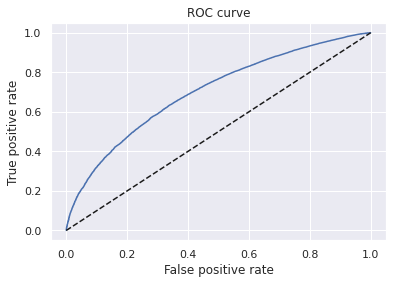

In [36]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [37]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
print("The AUROC here is:",AUROC)

The AUROC here is: 0.7012528401910878


# Applying the PD Model

### Creating a Scorecard

In [38]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.256114,NaN
1,grade:A,1.161767,6.465676e-38
2,grade:B,0.909561,6.094487e-51
3,grade:C,0.710984,7.723880e-37
4,grade:D,0.519149,1.353487e-22
...,...,...,...
74,dti:22.4-35,0.064989,2.505056e-01
75,mths_since_last_delinq:Missing,0.183465,9.662150e-05
76,mths_since_last_delinq:4-30,0.208710,1.341142e-05
77,mths_since_last_delinq:31-56,0.259619,9.373489e-08


In [39]:
ref_categories

['grade:G',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3']

In [40]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan

In [41]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.256114,NaN,Intercept
1,1,grade:A,1.161767,6.465676e-38,grade
2,2,grade:B,0.909561,6.094487e-51,grade
3,3,grade:C,0.710984,7.723880e-37,grade
4,4,grade:D,0.519149,1.353487e-22,grade
...,...,...,...,...,...
89,10,inq_last_6mths:>6,0.000000,NaN,inq_last_6mths
90,11,acc_now_delinq:0,0.000000,NaN,acc_now_delinq
91,12,annual_inc:<20K,0.000000,NaN,annual_inc
92,13,dti:>35,0.000000,NaN,dti


set the maximum scorecard and the minimum scorecard

In [42]:
min_score = 300
max_score = 850

In [43]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()

In [44]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()

In [46]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()

In [47]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']

In [48]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][77] = 16
df_scorecard

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.256114,NaN,Intercept,303.519398,304.0,0.480602,304.0
1,1,grade:A,1.161767,6.465676e-38,grade,93.847352,94.0,0.152648,94.0
2,2,grade:B,0.909561,6.094487e-51,grade,73.474233,73.0,-0.474233,73.0
3,3,grade:C,0.710984,7.723880e-37,grade,57.433141,57.0,-0.433141,57.0
4,4,grade:D,0.519149,1.353487e-22,grade,41.936748,42.0,0.063252,42.0
...,...,...,...,...,...,...,...,...,...
89,10,inq_last_6mths:>6,0.000000,NaN,inq_last_6mths,0.000000,0.0,0.000000,0.0
90,11,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000,0.0,0.000000,0.0
91,12,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000,0.0,0.000000,0.0
92,13,dti:>35,0.000000,NaN,dti,0.000000,0.0,0.000000,0.0


In [49]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()

### Caclulating Credit Score

In [50]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.256114,NaN,Intercept,303.519398,304.0,0.480602,304.0
1,1,grade:A,1.161767,6.465676e-38,grade,93.847352,94.0,0.152648,94.0
2,2,grade:B,0.909561,6.094487e-51,grade,73.474233,73.0,-0.474233,73.0
3,3,grade:C,0.710984,7.723880e-37,grade,57.433141,57.0,-0.433141,57.0
4,4,grade:D,0.519149,1.353487e-22,grade,41.936748,42.0,0.063252,42.0
...,...,...,...,...,...,...,...,...,...
89,10,inq_last_6mths:>6,0.000000,NaN,inq_last_6mths,0.000000,0.0,0.000000,0.0
90,11,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000,0.0,0.000000,0.0
91,12,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000,0.0,0.000000,0.0
92,13,dti:>35,0.000000,NaN,dti,0.000000,0.0,0.000000,0.0


In [51]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,...,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57
362514,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
213591,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
263083,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [52]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [53]:
scorecard_scores = df_scorecard['Score - Final']

In [54]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 94)

In [55]:
scorecard_scores.shape

(94,)

In [56]:
scorecard_scores = scorecard_scores.values.reshape(94, 1)

In [57]:
scorecard_scores.shape

(94, 1)

In [58]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.

In [59]:
y_scores.head()

,0
362514,607.0
288564,539.0
213591,565.0
263083,628.0
165001,678.0


### From Credit Score to PD

In [60]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [61]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)

In [62]:
df_actual_predicted_probs['y_hat_test_proba'].head()

362514    0.925377
288564    0.841643
213591    0.885692
263083    0.941302
165001    0.968927
Name: y_hat_test_proba, dtype: float64

### Setting Cut-offs

In [63]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [64]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079083,0.030185
1,0.385033,0.505699


In [65]:
from sklearn.metrics import roc_curve, roc_auc_score

In [66]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [67]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

In [68]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
df_cutoffs['Score'][0] = max_score

In [69]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [70]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [71]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.992227,0.000000,0.000012,797.0,1,93256,0.000011,0.999989
2,0.990846,0.000000,0.000096,783.0,8,93249,0.000086,0.999914
3,0.990806,0.000098,0.000096,783.0,9,93248,0.000097,0.999903
4,0.990027,0.000098,0.000313,776.0,27,93230,0.000290,0.999710


In [72]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [73]:
df_scorecard.to_csv('df_scorecard.csv')